In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re


In [15]:

df_hospitaldischarge=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')

In [14]:

df_CardiacComplications=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='CardiacComplications')

In [16]:
df_hospitaldischarge

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,death_within_28_days,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,None,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,None,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,None,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
3,775928,Home,Cardiology,Emergency,Cardiology,1,None,OxygenTherapy,11,2017-10-02,...,0,1,0,1,0,1,NaN,19.0,1.0,19.0
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,None,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,None,OxygenTherapy,5,2016-02-07,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2004,734280,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,None,OxygenTherapy,8,2017-03-29,...,0,0,0,0,0,0,NaN,NaN,0.0,NaN
2005,781004,HealthcareFacility,Cardiology,Emergency,Cardiology,1,None,OxygenTherapy,14,2018-01-22,...,0,0,0,1,0,1,NaN,76.0,1.0,76.0
2006,744870,Unknown,Cardiology,NonEmergency,Cardiology,1,IMV,OxygenTherapy,1,2019-11-27,...,1,0,1,0,1,0,1.0,NaN,0.0,NaN


In [17]:

df_CardiacComplications

,inpatient_number,NYHA_cardiac_function_classification,Killip_grade,myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease,type_of_heart_failure,LVEF,left_ventricular_end_diastolic_diameter_LV,mitral_valve_EMS,mitral_valve_AMS,EA,tricuspid_valve_return_velocity,tricuspid_valve_return_pressure
0,857781,3,3,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,743087,3,1,0,0,0,Both,NaN,40.0,1.16,1.52,NaN,3.34,47.0
2,866418,2,2,0,0,0,Both,NaN,46.0,0.84,0.12,7.00,2.80,32.0
3,775928,3,2,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,3,2,0,0,0,Both,NaN,64.0,1.20,0.90,1.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,4,1,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,734280,4,2,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,2.78,NaN
2005,781004,3,1,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,744870,4,4,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_Labs=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')

In [19]:
df_Labs


,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
0,857781,36.7,87,19,102,64,76.666667,33,108.3,12.55,...,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,743087,36.8,95,18,150,70,96.666667,33,62.0,4.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,866418,36.5,98,18,102,67,78.666667,33,185.1,15.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,775928,36.0,73,19,110,74,86.000000,33,104.8,8.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,35.0,88,19,134,62,86.000000,33,83.9,6.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,36.1,117,22,120,80,93.333333,33,115.3,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,734280,36.3,70,21,120,86,97.333333,29,63.1,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,781004,36.8,113,19,135,100,111.666667,33,51.9,4.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,744870,36.4,134,19,92,72,78.666667,41,191.1,35.87,...,-2.5,18.8,0.3,37.0,96.0,84.0,95.6,21.8,0.94,139.0


In [29]:
missing_percentages = (df_Labs.isnull().sum() / len(df_Labs)) * 100

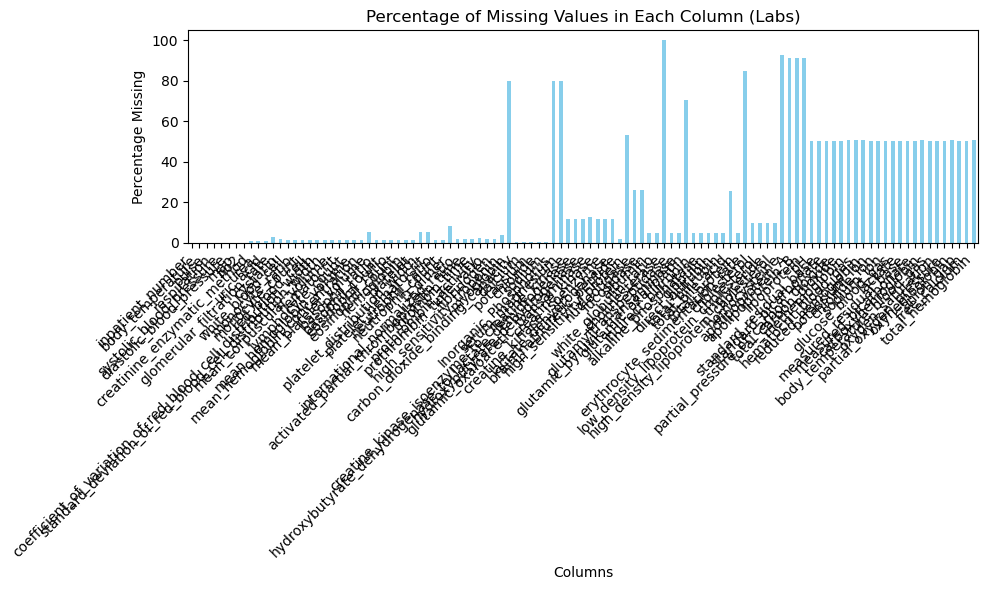

In [61]:
## Question no.10 Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph?
missing_percentages = (df_Labs.isnull().sum() / len(df_Labs)) * 100
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column (Labs)')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
missing_percentage = (df_Labs.isnull().sum() / len(df_Labs)) * 100

In [39]:
df_Demography=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')

In [40]:
df_Demography

,inpatient_number,gender,weight,height,BMI,occupation,ageCat
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79
2,866418,Male,70.0,1.70,24.221453,farmer,59-69
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79
...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59


In [51]:
## Question no.1 How many patients were registered in each unique occupation?
df_Demography.groupby('occupation').size()


occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
dtype: int64

([0, 1], [Text(0, 0, '[3, 8)'), Text(1, 0, '[8, 13)')])

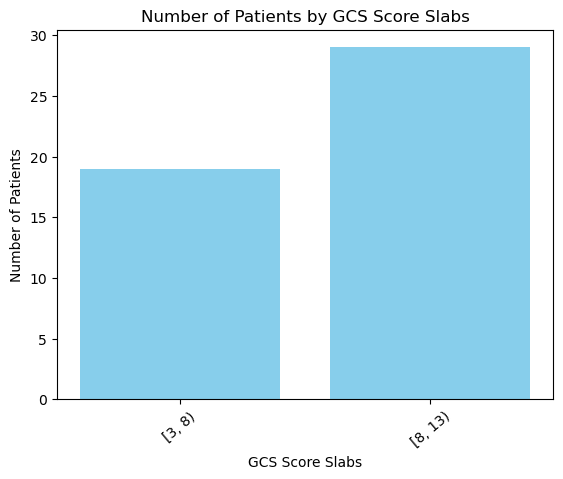

In [82]:
# question no. 2 Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice
# Define slabs of GCS scores with a width of 5
slabs = range(3, 16, 5)

# Create bins for the GCS scores
bins = pd.cut(df_Responsivenes['GCS'], bins=slabs, right=False, include_lowest=True)

# Count the number of patients falling within each slab
#counts = bins.value_counts(sort=False)

# Plot the counts as a bar graph
plt.bar(counts.index.astype(str), counts.values, color='skyblue')
plt.title('Number of Patients by GCS Score Slabs')
plt.xlabel('GCS Score Slabs')
plt.ylabel('Number of Patients')
plt.xticks(rotation=40)
##plt.tight_layout()
##plt.show()

In [80]:
df_Responsivenes=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Responsivenes')

In [54]:
df_Responsivenes

,inpatient_number,eye_opening,verbal_response,movement,consciousness,GCS
0,857781,4,5,6,Clear,15
1,743087,4,5,6,Clear,15
2,866418,4,5,6,Clear,15
3,775928,4,5,6,Clear,15
4,810128,4,5,6,Clear,15
...,...,...,...,...,...,...
2003,740689,4,5,6,Clear,15
2004,734280,4,5,6,Clear,15
2005,781004,4,5,6,Clear,15
2006,744870,1,1,1,Nonresponsive,3


In [99]:
# Question no.3 Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you?
# Convert "Admission date" to datetime
df_Hospitalization_Discharge['Admission date'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date'])
# Add calculated column "Discharge date" by adding "Discharge day" to "Admission date"
df_Hospitalization_Discharge['Discharge date'] = df_Hospitalization_Discharge['Admission_date'] + pd.to_timedelta(df_Hospitalization_Discharge['dischargeDay'], unit='D')

# Display the DataFrame
df_Hospitalization_Discharge['Discharge date']

0      2017-02-04
1      2017-05-13
2      2016-11-23
3      2017-10-13
4      2019-11-22
          ...    
2003   2016-02-12
2004   2017-04-06
2005   2018-02-05
2006   2019-11-28
2007   2017-02-23
Name: Discharge date, Length: 2008, dtype: datetime64[ns]

In [104]:
df_CardiacComplications.groupby('type_of_heart_failure').size()

type_of_heart_failure
Both     1480
Left      477
Right      51
dtype: int64

In [105]:
#Question no 4. Count the number of patients with biventricular heart failure
num_biventricular_failure = df_CardiacComplications['type_of_heart_failure'].str.contains('both', case=False).sum()

# Count the total number of patients
total_inpatient_number = len(df_CardiacComplications)

# Calculate the percentage
percentage_biventricular_failure = (num_biventricular_failure / total_inpatient_number) * 100

# Print the result
print(f"The percentage of patients with biventricular heart failure is: {percentage_biventricular_failure:.2f}%")

The percentage of patients with biventricular heart failure is: 73.71%
